In [1]:
import pandas as pd

In [373]:
hotels = pd.read_csv('D:\IDE\Project_3\Data\hotels.csv')
hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [291]:
# hotels['hotel_address'][0]

'Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom'

In [184]:
# hotels[hotels['hotel_address'].str.contains('United Kingdom')].shape

(196774, 25)

In [242]:
# hotels[hotels['hotel_address'].str.contains('Italy')].shape

(27883, 32)

In [243]:
# mask1 = hotels['country'] == 'Italy'
# mask2 = hotels['hotel_address'].str.contains('Roma')
# hotels[mask1 & mask2].shape

(662, 32)

In [374]:
hotels['country'] = hotels['hotel_address'].str.split().str[-1]
hotels['country'].nunique()
hotels['country'].replace('Kingdom', 'United Kingdom', inplace=True)
country_group = hotels.groupby(['country'])['country'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)


country_group.head(10)

,country,counts
5,United Kingdom,196774
4,Spain,45132
1,France,44830
3,Netherlands,43006
0,Austria,29178
2,Italy,27883


In [375]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [314]:
# list_of_na_lat = hotels[hotels['lat'].isna()].groupby('hotel_address')['hotel_address'].count().reset_index(name='counts')
# display(list(list_of_na_lat['hotel_address']))

['20 Rue De La Ga t 14th arr 75014 Paris France',
 '23 Rue Damr mont 18th arr 75018 Paris France',
 '4 rue de la P pini re 8th arr 75008 Paris France',
 'Bail n 4 6 Eixample 08010 Barcelona Spain',
 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
 'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
 'Pau Clar s 122 Eixample 08009 Barcelona Spain',
 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
 'Sep lveda 180 Eixample 08011 Barcelona Spain',
 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria']

In [356]:
# mask_add = hotels['hotel_address'].str.contains('75014')#'20 Rue De La Ga t 14th arr 75014 Paris France'
# mask_add_na = hotels['lat'].isna()
# display(hotels[mask_add][['hotel_name', 'lat']])
# display(hotels[mask_add & mask_add_na][['hotel_name', 'lat']])


,hotel_name,lat
1117,Pullman Paris Montparnasse,48.838294
1344,Suites H tel Helzear Montparnasse,48.834681
1536,H tel Aiglon Esprit de France,48.839662
1604,Novotel Suites Paris Expo Porte de Versailles,48.827388
1674,H tel Concorde Montparnasse,48.838108
...,...,...
386016,Novotel Suites Paris Expo Porte de Versailles,48.827388
386216,H tel Concorde Montparnasse,48.838108
386285,Pullman Paris Montparnasse,48.838294
386406,BoB Hotel by Elegancia,48.833523


,hotel_name,lat


In [360]:
# hotels[hotels['hotel_address'] == '20 Rue De La Ga t 14th arr 75014 Paris France']['lat'].head(1)

6920    (lat_mean)
Name: lat, dtype: object

In [376]:
hotels['index'] = hotels['hotel_address'].str.split().str[-3]
# train_df['Embarked'].replace(np.nan, 'S', inplace = True)
hotels['index'].head()

0      8LT
1      5AF
2    75006
3    75019
4       AG
Name: index, dtype: object

In [377]:
# расчитываем средние lat и lng по индексу
groupped = hotels.groupby(['index']).agg({'lat': 'mean', 'lng': 'mean'}).reset_index()
# df.groupby(['team', 'position']).agg({'assists': ['mean']}). reset_index()
groupped


,index,lat,lng
0,08001,41.380124,2.170508
1,08002,41.384021,2.172533
2,08003,41.385684,2.178993
3,08004,41.373436,2.156457
4,08005,41.394129,2.199375
...,...,...,...
561,XL,52.356092,4.885823
562,XP,52.392368,4.911044
563,ZD,52.361381,4.883259
564,ZP,52.358382,4.898878


In [378]:
groupped.rename(columns = {'lat':'lat_mean', 'lng': 'lng_mean'}, inplace = True )

In [379]:
# заполняем пропущенные значения lat и lng
# добавляем в таблицу столбцы со средними значениями
hotels = pd.merge(hotels, groupped, how='left', on='index')
# заполняем пропуски из столбцов со средними значениями

hotels['lat'].fillna(hotels['lat_mean'], inplace=True)
hotels['lng'].fillna(hotels['lng_mean'], inplace=True)
display(hotels['lat'].isna().sum())
display(hotels['lng'].isna().sum())

0

0

In [341]:
# groupped[groupped['index'] == '75006']

,index,lat
,,mean
366,75006,48.850908


In [369]:
# hotels = pd.merge(hotels, groupped, how='left', on='index')

C:\Users\Alexey\AppData\Local\Temp\ipykernel_1140\3833968566.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  hotels = pd.merge(hotels, groupped, how='left', on='index')
C:\Users\Alexey\AppData\Local\Temp\ipykernel_1140\3833968566.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  hotels = pd.merge(hotels, groupped, how='left', on='index')


In [380]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386803 entries, 0 to 386802
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [363]:
# hotels['lat'].fillna(hotels['(lat_mean)'], inplace=True)
# # hotels['lng'].fillna(hotels['(lng_mean)'], inplace=True)

KeyError: '(lat_mean)'

In [354]:
hotels['lat'].head()

0    51.507894
1    51.521009
2    48.845377
3    48.888697
4    52.385601
Name: lat, dtype: object

In [381]:
# кодируем страны через OneHotEncoder
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['country'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['country'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,country,index,lat_mean,lng_mean,country_United Kingdom,country_France,country_Netherlands,country_Italy,country_Austria,country_Spain
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,United Kingdom,8LT,51.507894,-0.143671,1,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,United Kingdom,5AF,51.521009,-0.123097,1,0,0,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,France,75006,48.850908,2.334945,0,1,0,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,France,75019,48.895436,2.387006,0,1,0,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,Netherlands,AG,52.385601,4.847060,0,0,1,0,0,0


In [382]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386803 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [63]:
# НЕ ДЕЛАЮ!!!!!
# бинарное кодирование признака название отеля

import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,hotel_name_1,hotel_name_2,hotel_name_3,hotel_name_4,hotel_name_5,hotel_name_6,hotel_name_7,hotel_name_8,hotel_name_9,hotel_name_10
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,0,0,0,0,0,0,0,1,0


In [383]:
# пятый маре
# бинарное кодирование признака национальонсть

import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,country_Austria,country_Spain,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
# X = hotels.drop(['reviewer_score', 'hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review'], axis = 1)  
# y = hotels['reviewer_score'] 
# X.fillna(value=0, inplace=True)

In [384]:
# приводим колонку days_since_review в числовой вид
hotels['days_since_review'] = hotels['days_since_review'].str.replace(' day', '')
hotels['days_since_review'] = hotels['days_since_review'].str.replace('s', '').astype(int)
# hotels['days_since_review']

In [385]:
hotels['days_since_review'].tail()

386798    106
386799    171
386800    543
386801     74
386802    363
Name: days_since_review, dtype: int32

In [7]:
# # переводим дату в правильный формат
# hotels['review_date'] = pd.to_datetime(hotels['review_date'])
# считаем количество дней с даты отзыва


In [386]:
# удаляем вспомогательные столбцы
hotels.drop(['index', 'lat_mean', 'lng_mean'], axis = 1, inplace = True)

In [387]:
# делаю удаление колонок через тип столбца, чтобы ничего не забыть (вместо ячейки ниже)
coll_to_drop = hotels.select_dtypes('object')
X = hotels.drop(coll_to_drop, axis = 1)  
y = hotels['reviewer_score'] 
X.fillna(value=0, inplace=True)

In [154]:
# предыдущую ячейку чуть меняем. чтобы не удалять все колонки
X = hotels.drop(['reviewer_score', 'hotel_address', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'review_date'], axis = 1)  
y = hotels['reviewer_score'] 
X.fillna(value=0, inplace=True)

In [388]:
X.head(1)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,country_Austria,country_Spain,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,581,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,0,1


In [389]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [390]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [391]:
X_train.head(1)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,country_Austria,country_Spain,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
22852,488,8.2,43,4645,55,13,9.2,421,41.411165,2.219201,...,0,1,0,0,0,0,0,0,0,1


In [392]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290102 entries, 22852 to 121958
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                290102 non-null  int64  
 1   average_score                               290102 non-null  float64
 2   review_total_negative_word_counts           290102 non-null  int64  
 3   total_number_of_reviews                     290102 non-null  int64  
 4   review_total_positive_word_counts           290102 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  290102 non-null  int64  
 6   reviewer_score                              290102 non-null  float64
 7   days_since_review                           290102 non-null  int32  
 8   lat                                         290102 non-null  float64
 9   lng                                         290102 non-null  float

In [393]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

In [394]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 1.486279760734215e-07


In [395]:
import numpy as np # linear algebra

In [396]:
# Пишем свою функцию Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [397]:
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 1.486279760734215e-05


первый MAPE: 0.14131434839348644
второй MAPE: 0.1380683564005859 (добавила срок после ревью в числовой форме)
третий MAPE: 0.13819117179135207 (бинарное кодирование признака наименование отелей) - неудачно, не используем
четвертый MAPE: 3.0129830185071713e-13 (бинарное кодирование признака тег) - сделано внизу. не подходит, так как меняет количество строк, что не сочетается с submission
пятый MAPE: 0.1367376325834987 (бинарное кодирование национальности)
шестой MAPE: 2.0115218739440368e-07 (бинарное кодирование национальности + onehot кодирование страны отеля)

In [16]:
# непрерывные признаки 
# # новая версия
# num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_date' , 'additional_number_of_scoring']

# # категориальные признаки
# cat_cols = ['average_score', 'lat', 'lng']

эту часть пропускаю, так как не понимаю

In [149]:
# непрерывные признаки 

num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot:>

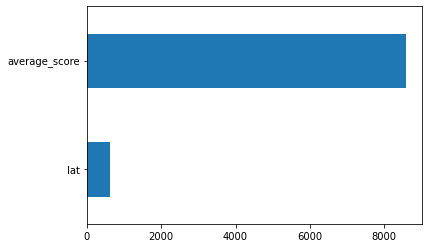

In [150]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

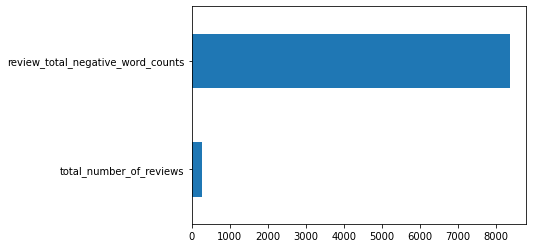

In [41]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

часть вычислений для задач на платформе

In [20]:
hotels.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671


In [21]:
hotels['hotel_name'].nunique()

1492

In [22]:
# hotels['lat'].nunique()

1472

In [24]:
mask_2 = hotels['hotel_name'] == 'Hotel Atlanta'
mask_3 = hotels['lat'] > 0
display(hotels[mask_2 & mask_3])

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng


In [111]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 21 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  int64  
 6   reviewer_score                              float64
 7   days_since_review                           int32  
 8   lat                                         float64
 9   lng                                         float64
 10  hotel_name_0                                int64  
 11  hotel_name_1                                int64  
 12  hotel_name_2                                int64  
 13  hotel_name_3                

In [26]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

In [27]:
hotels['review_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 386803 entries, 0 to 386802
Series name: review_date
Non-Null Count   Dtype         
--------------   -----         
386803 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [28]:
hotels['review_date'][0]

Timestamp('2016-02-19 00:00:00')

In [29]:
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

In [30]:
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

In [31]:
print(hotels['tags'][0])
print(hotels['tags'][1])

[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']


In [130]:
hotels_new = hotels.copy() # создаем копию таблицы

In [131]:
#убираем лишние символы
hotels_new['tags'] = hotels_new['tags'].str.replace('[', '') 
hotels_new['tags'] = hotels_new['tags'].str.replace(']', '')
hotels_new['tags'] = hotels_new['tags'].str.replace("' ", "")
hotels_new['tags'] = hotels_new['tags'].str.replace(" '", "")
# разбиваем на список
hotels_new['tags'] = hotels_new['tags'].str.split(", ")
hotels_new['tags'][3]

C:\Users\Alexey\AppData\Local\Temp\ipykernel_1140\1925812934.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hotels_new['tags'] = hotels_new['tags'].str.replace('[', '')
C:\Users\Alexey\AppData\Local\Temp\ipykernel_1140\1925812934.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hotels_new['tags'] = hotels_new['tags'].str.replace(']', '')


['Leisure trip',
 'Solo traveler',
 'Standard Room with 1 Double Bed',
 'Stayed 1 night']

In [132]:
# переводим значения из списка в строки
hotels_all_tags_row = hotels_new.explode(['tags'])
hotels_all_tags_row.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Leisure trip,531,51.507894,-0.143671


In [133]:
hotels_all_tags_row.shape

(1767522, 17)

In [134]:
hotels_all_tags_row['tags'].nunique() # количество уникальных тегов

2368

In [135]:
# бинарное кодирование признака тег

# import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['tags']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_all_tags_row['tags'])
hotels_all_tags_row = pd.concat([hotels_all_tags_row, type_bin], axis=1)

hotels_all_tags_row.shape

(1767522, 29)

In [136]:
hotels_all_tags_row.select_dtypes(exclude='object').head(2)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9,tags_10,tags_11
0,581,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,0,1
0,581,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,1,0


In [137]:
hotels_all_tags_row.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  int64  
 6   reviewer_score                              float64
 7   days_since_review                           int32  
 8   lat                                         float64
 9   lng                                         float64
 10  tags_0                                      int64  
 11  tags_1                                      int64  
 12  tags_2                                      int64  
 13  tags_3                      

In [37]:
# самый частый тег
tags_group = hotels_all_tags_row.groupby(['tags'])['tags'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)
tags_group.head()

# df2 = df.groupby(['Courses'])['Courses'].count()

# df.sort_values(by='likes', ascending=False)

,tags,counts
1237,Leisure trip,313593
1842,Submitted from a mobile device,230778
272,Couple,189212
1788,Stayed 1 night,145373
1799,Stayed 2 nights,100263


In [138]:
# предыдущую ячейку чуть меняем. чтобы не удалять все колонки
coll_to_drop = hotels_all_tags_row.select_dtypes('object')
X = hotels_all_tags_row.drop(coll_to_drop, axis = 1)  
y = hotels_all_tags_row['reviewer_score'] 
X.fillna(value=0, inplace=True)

In [139]:
coll_to_drop # проверка, что удалили

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags
0,Stratton Street Mayfair Westminster Borough Lo...,2/19/2016,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,Leisure trip
0,Stratton Street Mayfair Westminster Borough Lo...,2/19/2016,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,Couple
0,Stratton Street Mayfair Westminster Borough Lo...,2/19/2016,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,Studio Suite
0,Stratton Street Mayfair Westminster Borough Lo...,2/19/2016,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,Stayed 2 nights
0,Stratton Street Mayfair Westminster Borough Lo...,2/19/2016,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,Submitted from a mobile device
...,...,...,...,...,...,...,...
386801,31 Great Cumberland Place Westminster Borough ...,5/21/2017,The Marble Arch London,United Arab Emirates,No Negative,Location and very comfy bed,Stayed 2 nights
386802,25 Courtfield Gardens Kensington and Chelsea L...,8/5/2016,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,Beds comfortable Pillows also good Homely fee...,Leisure trip
386802,25 Courtfield Gardens Kensington and Chelsea L...,8/5/2016,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,Beds comfortable Pillows also good Homely fee...,Couple
386802,25 Courtfield Gardens Kensington and Chelsea L...,8/5/2016,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,Beds comfortable Pillows also good Homely fee...,Bunk Bed Room


In [140]:
X.info() #проверяем. что осталось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  int64  
 6   reviewer_score                              float64
 7   days_since_review                           int32  
 8   lat                                         float64
 9   lng                                         float64
 10  tags_0                                      int64  
 11  tags_1                                      int64  
 12  tags_2                                      int64  
 13  tags_3                      

In [141]:
# РАЗБИВКА ПО НОВОМУ ДАТАСЕТУ
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [142]:
# Создаём НОВУЮ модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

In [143]:
# Четвертай МАРЕ после разбивки тегов
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 3.0129830185071713e-13


In [144]:
hotels['reviewer_nationality'].nunique() 

225

In [3]:
# Проверка негативности отзыва

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "The hotel was very good, I love it!"
rev2 = "It was just horrible, the worst ever."

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alexey\AppData\Roaming\nltk_data...


review 1:
The hotel was very good, I love it!
Score: {'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

review 2:
It was just horrible, the worst ever.
Score: {'neg': 0.603, 'neu': 0.397, 'pos': 0.0, 'compound': -0.8225}


In [297]:
hotels[['country', 'reviewer_nationality']].head()

,country,reviewer_nationality
0,United Kingdom,United Kingdom
1,United Kingdom,United Kingdom
2,France,China
3,France,United Kingdom
4,Netherlands,Poland


In [302]:
# проверка относится ли национальность к месту отеля

hotels['origins_check'] = hotels['country']
# df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))